### Loading the MNIST dataset in Keras

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 271s 24us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### The network architecture

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

### The compilation step

In [11]:
network.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

### Preparing the image data

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### Preparing the labels

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We’re now ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2551 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1036 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0677 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0492 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0373 - acc: 0.9889


Now let’s check that the model performs well on the test set, too:

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

10000/10000 [==============================] - 1s 79us/step
test_acc: 0.9785


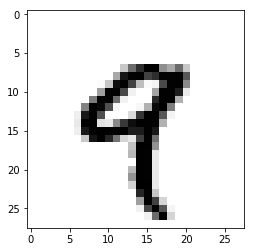

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

digit = train_images[4]
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Formula for the *n*th batch:

batch = train_images\[128 \* n : 128 \* (n + 1)\]

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. 

The data you’ll manipulate will almost always fall into one of the following categories:

* Vector data—2D tensors of shape (samples, features)

* Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)

* Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

* Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

#### Vector data

A batch of data will be encoded as a 2D tensor (that is, an array of vectors), where the first axis is the samples axis and the second axis is the features axis.

##### Two examples:

An actuarial dataset of people, where we consider each person’s age, ZIP code,
and income. Each person can be characterized as a vector of 3 values, and thus
an entire dataset of 100,000 people can be stored in a 2D tensor of shape
(100000, 3).

A dataset of text documents, where we represent each document by the counts
of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one
count per word in the dictionary), and thus an entire dataset of 500 documents
can be stored in a tensor of shape (500, 20000).

#### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense
to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a
sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D
tensor

![alt text](images/series.png "Time Series")

The time axis is always the second axis (axis of index 1), by convention. Let’s look at a
few examples:

* A dataset of stock prices. Every minute, we store the current price of the stock,
the highest price in the past minute, and the lowest price in the past minute.
Thus every minute is encoded as a 3D vector, an entire day of trading is
encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading
day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250,
390, 3). Here, each sample would be one day’s worth of data.

* A dataset of tweets, where we encode each tweet as a sequence of 280 characters
out of an alphabet of 128 unique characters. In this setting, each character can
be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry
at the index corresponding to the character). Then each tweet can be encoded
as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be
stored in a tensor of shape (1000000, 280, 128).

#### Image data

![alt text](images/image.png "Image")

Images typically have three dimensions: height, width, and color depth. 

Grayscale images (like our MNIST digits) have only a single color channel and could
thus be stored in 2D tensors.

By convention image tensors are always 3D, with a one dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

Two conventions for shapes of images tensors: 

*channels-last* convention (used by TensorFlow):
places the color-depth axis at the end: (samples, height, width, color_depth)

*channels-first* convention (used by Theano): places the color depth axis right after the batch axis: (samples, color_depth, height, width). 

With the Theano convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). The Keras framework provides support for both formats.


**The Keras framework provides support for both formats.**

#### Video data

Video data is one of the few types of real-world data for which you’ll need 5D tensors.
A video can be understood as a sequence of frames, each frame being a color image.
Because each frame can be stored in a 3D tensor (height, width, color_depth), a
sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a 5D tensor of shape
(samples, frames, height, width, color_depth).


For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per
second would have 240 frames. A batch of four such video clips would be stored in a
tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the
dtype of the tensor was float32, then each value would be stored in 32 bits, so the
tensor would represent 405 MB. Heavy! Videos you encounter in real life are much
lighter, because they aren’t stored in float32, and they’re typically compressed by a
large factor (such as in the MPEG format).

### Broadcasting

1 Axes (called broadcast axes) are added to the smaller tensor to match the ndim of
the larger tensor.

2 The smaller tensor is repeated alongside these new axes to match the full shape
of the larger tensor

With broadcasting, you can generally apply two-tensor element-wise operations if one
tensor has shape (a, b, … n, n + 1, … m) and the other has shape (n, n + 1, … m). The
broadcasting will then automatically happen for axes *a* through *n - 1*.

In [19]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.minimum(x, y)

In [20]:
z.shape

(64, 3, 32, 10)

In [21]:
z

array([[[[ 0.75069821,  0.16130942,  0.38884924, ...,  0.15575001,
           0.24936032,  0.37083805],
         [ 0.55356849,  0.21229857,  0.26908443, ...,  0.6546875 ,
           0.40958619,  0.0141628 ],
         [ 0.07901873,  0.34900568,  0.23717075, ...,  0.08270249,
           0.04828707,  0.66042581],
         ..., 
         [ 0.67744607,  0.00582571,  0.45689244, ...,  0.64181985,
           0.09550368,  0.18371791],
         [ 0.41151263,  0.77417962,  0.30570454, ...,  0.08403572,
           0.02559789,  0.50572916],
         [ 0.56267997,  0.07924363,  0.0283467 , ...,  0.51536288,
           0.56257893,  0.74142897]],

        [[ 0.75069821,  0.49244232,  0.71398308, ...,  0.15575001,
           0.24936032,  0.37083805],
         [ 0.54610355,  0.26809135,  0.26908443, ...,  0.44582135,
           0.2152717 ,  0.11274713],
         [ 0.07901873,  0.34900568,  0.21720843, ...,  0.08420768,
           0.04828707,  0.02501114],
         ..., 
         [ 0.2737136 ,  0.611329

### Layers: the building blocks of deep learning

Different layers are appropriate for different tensor formats and different types of data
processing. 
For instance, simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras). 

Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers such as an LSTM layer.

Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D).

The notion of layer compatibility here refers specifically to the fact that every layer
will only accept input tensors of a certain shape and will return output tensors of a certain shape. Consider the following example:

In [22]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,))

We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, *the batch dimension, is unspecified, and thus any value would be accepted*). This layer will return a tensor where the first dimension has been transformed to be 32.

When using Keras, you don’t have to worry about
compatibility, because the layers you add to your models are dynamically built to
match the shape of the incoming layer. For instance, suppose you write the following:

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

The second layer didn’t receive an input shape argument—instead, it automatically
inferred its input shape as being the output shape of the layer that came before.

### Loss functions and optimizers: keys to configuring the learning process

Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.

Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

there are simple guidelines you can follow to choose the
correct loss. 

You’ll use binary crossentropy for a two-class classification problem 

categorical crossentropy for a many-class classification problem

mean squared error for a regression problem

connectionist temporal classification (CTC) for a sequence-learning problem


### Introduction to Keras

Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.

* It has a user-friendly API that makes it easy to quickly prototype deep-learning models.

* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.

* It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.

Keras is a model-level library, providing high-level building blocks for developing deep-learning models. 

It doesn’t handle low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor library to do so, serving as the backend engine of Keras. 

Rather than choosing a single tensor library and tying the implementation of Keras to that library, Keras handles the problem in a modular way (see figure 3.3); thus several different backend engines can be plugged seamlessly into Keras. 

Currently, the three existing backend implementations are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive Toolkit (CNTK) backend. 

Any piece of code that you write with Keras can be run with any of these backends without having to change anything in the code: you can seamlessly switch between the two
during development.

We recommend using the TensorFlow backend as the default for most of your deep-learning needs, because it’s the most widely adopted, scalable, and production ready.

Via TensorFlow (or Theano, or CNTK), Keras is able to run seamlessly on both CPUs and GPUs. When running on CPU, TensorFlow is itself wrapping a low-level library for tensor operations called Eigen (http://eigen.tuxfamily.org). 

On GPU, TensorFlow wraps a library of well-optimized deep-learning operations called the NVIDIA CUDA Deep Neural Network library (cuDNN).

### Developing with Keras: a quick overview

![alt text](images/keras.png "Image")

1 Define your training data: input tensors and target tensors.

2 Define a network of layers (or model ) that maps your inputs to your targets.

3 Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.

4 Iterate on your training data by calling the fit() method of your model.

Two ways to define a model: 
*Sequential* class: only for linear stacks of layers, which is the most common network architecture by far

*functional API* :for directed acyclic graphs of layers, which lets you build completely arbitrary architectures

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(784,)))
model.add(layers.Dense(10, activation="softmax"))

And here’s the same model defined using the functional API:

In [25]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation="relu")(input_tensor)
output_tensor = layers.Dense(10, activation="softmax")(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

Once your model architecture is defined, it doesn’t matter whether you used a Sequential model or the functional API. All of the following steps are the same:

The learning process is configured in the *compilation step*, where you specify the *optimizer* and *loss function(s)* that the model should use, as well as the metrics you want to monitor during training.

Here’s an example with a single loss function, which is by far the most common case:

In [26]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse", metrics=["accuracy"])

Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the **fit()** method, similar to what you would do in Scikit-Learn and several other machine-learning libraries:

In [27]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

### Setting up a deep-learning workstation

It’s highly recommended, although not strictly necessary, that you run deep-learning code on a modern NVIDIA GPU. Some applications—in particular, image processing with convolutional networks and sequence processing with recurrent neural networks—will be excruciatingly slow on CPU, even a fast multicore CPU.

And even for applications that can realistically be run on CPU, you’ll generally see speed increase by a factor or 5 or 10 by using a modern GPU. If you don’t want to
install a GPU on your machine, you can alternatively consider running your experiments on an *AWS EC2 GPU* instance or on *Google Cloud Platform*. But note that cloud GPU instances can become expensive over time.

It’s better to be using a Unix workstation. 

Note that in order to use Keras, you need to install TensorFlow or CNTK or Theano

Jupyter notebooks: the preferred way to run deep-learning experiments

All the code examples in this book are available as open source
notebooks; you can download them from the book’s website at 

www.manning.com/books/deep-learning-with-python.

### Getting Keras running: two options

* Use the official EC2 Deep Learning AMI (https://aws.amazon.com/amazonai/amis), and run Keras experiments as Jupyter notebooks on EC2. Do this if you don’t already have a GPU on your local machine. Appendix B provides a step-by-step guide.

* Install everything from scratch on a local Unix workstation. You can then run either local Jupyter notebooks or a regular Python codebase. Do this if you already have a high-end NVIDIA GPU. Appendix A provides an Ubuntu-specific, step-by-step guide.

### Running deep-learning jobs in the cloud: pros and cons

As of mid-2017, the cloud offering that makes it easiest to get started with deep learning is definitely AWS EC2.

EC2 instances are expensive

### What is the best GPU for deep learning?

The first thing to note is that it must be an NVIDIA GPU. NVIDIA is the only graphics computing company that has invested heavily in deep learning so far, and modern deep-learning frameworks can only run on NVIDIA cards

As of mid-2017, we recommend the NVIDIA TITAN Xp as the best card on the market for deep learning. For lower budgets, you may want to consider the GTX 1060. If
you’re reading these pages in 2018 or later, take the time to look online for fresher
recommendations, because new models come out every year.

### Installing Keras and its dependencies on Ubuntu

1 Install the Python scientific suite—Numpy and SciPy—and make sure you have a Basic Linear Algebra Subprogram (BLAS) library installed so your models run fast on CPU.

2 Install two extras packages that come in handy when using Keras: HDF5 (for saving large neural-network files) and Graphviz (for visualizing neuralnetwork architectures).

3 Make sure your GPU can run deep-learning code, by installing CUDA drivers and cuDNN.

4 Install a backend for Keras: TensorFlow, CNTK, or Theano.

5 Install Keras.

Before you start, make sure you have pip installed and that your package manager is up to date:

\$ sudo apt-get update

\$ sudo apt-get upgrade

\$ sudo apt-get install python-pip python-dev

By default, Ubuntu uses Python 2 when it installs Python packages such as pythonpip. If you wish to use Python 3 instead, you should use the python3 prefix instead of python. For instance:

\$ sudo apt-get install python3-pip python3-dev

When you’re installing packages using pip, keep in mind that by default, it targets Python 2. To target Python 3, you should use pip3:

\$ sudo pip3 install tensorflow-gpu

### Installing the Python scientific suite

1 Install a BLAS library (OpenBLAS, in this case), to ensure that you can run fast
tensor operations on your CPU:

\$ sudo apt-get install build-essential cmake git unzip \\
pkg-config libopenblas-dev liblapack-dev


2 Install the Python scientific suite: Numpy, SciPy and Matplotlib. This is necessary in order to perform any kind of machine learning or scientific computing in Python, regardless of whether you’re doing deep learning:

\$ sudo apt-get install python-numpy python-scipy python- matplotlib
➥python-yaml

3 Install HDF5. This library, originally developed by NASA, stores large files of numeric data in an efficient binary format. It will allow you to save your Keras models to disk quickly andefficiently:

\$ sudo apt-get install libhdf5-serial-dev python-h5py

4 Install Graphviz and pydot-ng, two packages that will let you visualize Keras models. They aren’t necessary to run Keras, so you could skip this step and install these packages when you need them. Here are the commands:

\$ sudo apt-get install graphviz

\$ sudo pip install pydot-ng

5 Install additional packages that are used in some of our code examples:

\$ sudo apt-get install python-opencv

### Setting up GPU support

To use your NVIDIA GPU for deep learning, you need to install two things:

**CUDA**: A set of drivers for your GPU that allows it to run a low-level programming language for parallel computing.
 
**cuDNN**: A library of highly optimized primitives for deep learning. When using cuDNN and running on a GPU, you can typically increase the training speed of your models by 50% to 100%

TensorFlow depends on particular versions of CUDA and the cuDNN library.

Please consult the TensorFlow website for detailed instructions about which versions are currently recommended: www.tensorflow.org/install/install_linux.

#### Follow these steps:

1 Download CUDA. For Ubuntu (and other Linux flavors), NVIDIA provides a ready-to-use package that you can download from https://developer.nvidia.com/cuda-downloads:

\$ wget http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_9.0.176-1_amd64.deb

2  Install CUDA. The easiest way to do so is to use Ubuntu’s apt on this package.
This will allow you to easily install updates via apt as they become available:

\$ sudo dpkg -i cuda-repo-ubuntu1604_9.0.176-1_amd64.deb

\$ sudo apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub

\$ sudo apt-get update

\$ sudo apt-get install cuda-8-0

3 Install cuDNN:

a) 
Register for a free NVIDIA developer account (unfortunately, this is necessary
in order to gain access to the cuDNN download), and download cuDNN at
https://developer.NVIDIA.com/cudnn (select the version of cuDNN compatible with TensorFlow). Like CUDA, NVIDIA provides packages for different Linux flavors—we’ll use the version for Ubuntu 16.04. Note that if you’re working with an EC2 install, you won’t be able to download the cuDNN archive directly to your instance; instead, download it to your local machine
and then upload it to your EC2 instance (via *scp*).

b) Install cuDNN:

\$ sudo dpkg -i dpkg -i libcudnn6*.deb

4 Install TensorFlow:
a) TensorFlow with or without GPU support can be installed from PyPI using
Pip. Here’s the command without GPU support:

\$ sudo pip install tensorflow

b) Here’s the command to install TensorFlow with GPU support:

\$ sudo pip install tensorflow-gpu

#### Installing Theano (optional)

Theano can also be installed from PyPI:

\$ sudo pip install theano

If you’re using a GPU, then you should configure Theano to use your GPU. You can create a Theano configuration file with this command:

nano ~/.theanorc

Then, fill in the file with the following configuration:

[global]

floatX = float32

device = gpu0



[nvcc]

fastmath = True

### Installing Keras

You can install Keras from PyPI:
\$ sudo pip install keras

Alternatively, you can install Keras from GitHub. Doing so will allow you to access the keras/examples folder, which contains many example scripts for you to learn from:

\$ git clone https://github.com/fchollet/keras

\$ cd keras

\$ sudo python setup.py install

You can now try to run a Keras script, such as this MNIST example:

python examples/mnist_cnn.py

Note that running this example to completion may take a few minutes, so feel free to force-quit it (Ctrl-C) once you’ve verified that it’s working normally.

After you’ve run Keras at least once, the Keras configuration file can be found at
~/.keras/keras.json. 
You can edit it to select the backend that Keras runs on: tensorflow, theano, or cntk. Your configuration file should like this:

{
"image_data_format": "channels_last",

"epsilon": 1e-07,

"floatx": "float32",

"backend": "tensorflow"
}


While the Keras script examples/mnist_cnn.py is running, you can monitor GPU utilization in a different shell window:

\$ watch -n 5 NVIDIA-smi -a --display=utilization

You’re all set! Congratulations—you can now begin building deep-learning applications.